In [39]:
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

In [61]:
# 랜덤 시드 설정
torch.manual_seed(321)
# 이미지 크기를 100 x 100 로 조정합니다
IMAGE_SIZE = 224

In [41]:
original_dataset=ImageFolder(root="data/flower_photos",
                             transform=transforms.Compose([
                                transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
                                transforms.ToTensor()
                             ]))
type(original_dataset)

torchvision.datasets.folder.ImageFolder

In [42]:
original_loader=DataLoader(original_dataset,
                           batch_size=100, #배치사이즈
                           shuffle=False,   # 셔플 여부
                           num_workers=1)

In [43]:
original_images, labels = next(iter(original_loader))
print(original_images.shape, labels.shape)
print(original_dataset)

torch.Size([100, 3, 224, 224]) torch.Size([100])
Dataset ImageFolder
    Number of datapoints: 2313
    Root location: data/flower_photos
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )


In [44]:
print(labels)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])


In [45]:
original_images[0]

tensor([[[0.5333, 0.5490, 0.5686,  ..., 0.6039, 0.6039, 0.5922],
         [0.5294, 0.5451, 0.5647,  ..., 0.6039, 0.6039, 0.5882],
         [0.5255, 0.5451, 0.5647,  ..., 0.6000, 0.6000, 0.5804],
         ...,
         [0.1765, 0.1725, 0.1725,  ..., 0.5098, 0.5098, 0.5059],
         [0.1725, 0.1725, 0.1725,  ..., 0.5137, 0.5098, 0.5098],
         [0.1725, 0.1725, 0.1725,  ..., 0.5176, 0.5176, 0.5176]],

        [[0.5333, 0.5490, 0.5686,  ..., 0.6039, 0.6039, 0.5922],
         [0.5294, 0.5451, 0.5647,  ..., 0.6039, 0.6039, 0.5882],
         [0.5255, 0.5451, 0.5647,  ..., 0.6000, 0.6000, 0.5804],
         ...,
         [0.1882, 0.1843, 0.1843,  ..., 0.4941, 0.4941, 0.4902],
         [0.1843, 0.1843, 0.1843,  ..., 0.4980, 0.4941, 0.4941],
         [0.1843, 0.1843, 0.1843,  ..., 0.5020, 0.5020, 0.5020]],

        [[0.5255, 0.5490, 0.5686,  ..., 0.5961, 0.6039, 0.5922],
         [0.5216, 0.5412, 0.5647,  ..., 0.5961, 0.6039, 0.5882],
         [0.5176, 0.5373, 0.5608,  ..., 0.5961, 0.6000, 0.

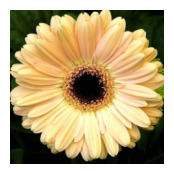

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(original_images[11].permute(1,2,0))
plt.grid(False)
plt.axis('off')
plt.show()

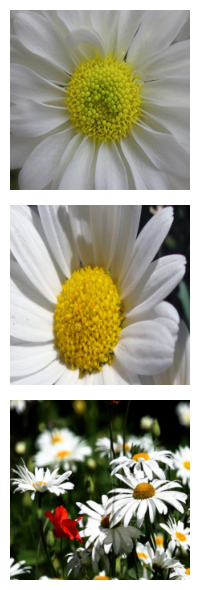

In [47]:
fig, axes = plt.subplots(3,1)
fig.set_size_inches(4,6)

for idx in range(3):
    axes[idx].imshow(original_images[idx].permute(1,2,0))
    axes[idx].set_axis_off()
fig.tight_layout()
plt.show()    

In [48]:
image_transform=transforms.Compose([
    transforms.Resize((256,256)),  # 이미지 크기를 동일하게
    transforms.CenterCrop((IMAGE_SIZE,IMAGE_SIZE)),
    transforms.ToTensor()
])

In [49]:
transforms_data=ImageFolder(root="data/flower_photos",
                            transform=image_transform)

In [50]:
transform_loader=DataLoader(transforms_data,
                            batch_size=100,
                            shuffle=False,
                            num_workers=1)

In [59]:
transforms_images, transform_labels =next(iter(transform_loader))
print(transforms_images.shape, transform_labels.shape)

torch.Size([100, 3, 224, 224]) torch.Size([100])


<function matplotlib.pyplot.show(close=None, block=None)>

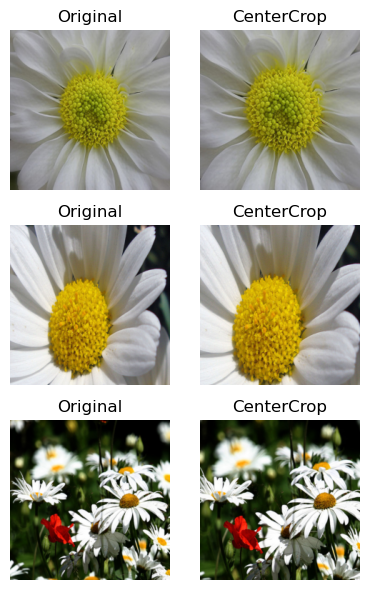

In [60]:
fig, axes=plt.subplots(3,2)
fig.set_size_inches(4, 6)
for idx in range(3):
    axes[idx, 0].imshow(original_images[idx].permute(1,2,0))
    axes[idx, 0].set_axis_off()
    axes[idx, 0].set_title("Original")
    axes[idx, 1].imshow(transforms_images[idx].permute(1,2,0))
    axes[idx, 1].set_axis_off()
    axes[idx, 1].set_title("CenterCrop")
fig.tight_layout()
plt.show